In [1]:
from Paisley_Algorithm import * 
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
random.seed(30)
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
import GPy
import datafold
from datafold.pcfold import PCManifold
from datafold.pcfold import kernels
from datafold.pcfold import estimate_scale
from sklearn.model_selection import train_test_split

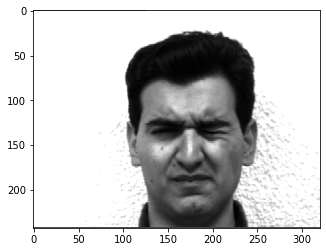

In [2]:
imageformat=".jpg"
path ="C:/Users/anany/Desktop/master_thesis-master/yalefaces/yalefaces/"
imfilelist=[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imageformat)]
imagelist = []
for el in imfilelist:
        image = Image.open(el)
        image=np.array(image)
        imagelist.append(image)
        plt.imshow(image,cmap = 'gray')

In [3]:
imagelist = np.array(imagelist) 
imagelist = imagelist.reshape(imagelist.shape[0], -1)
imagelist = imagelist / 255.0

In [7]:
y = np.array([int(i / 11) for i in range(imagelist.shape[0])])
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14])

### Compute accuracies using KNN and GP

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imagelist, y, test_size=0.20, random_state=42)

In [9]:
X_train.shape

(132, 77760)

In [14]:
count = np.zeros(15)
tot_landmarks = np.array([])
labels = []
x = []
for j in range(15):
    cat_data = []
    new_labels = []
    for i in range(y_train.shape[0]):
        if (y_train[i] == j and count[y_train[i]] < 6):
            new_labels.append(y_train[i])
            cat_data.append(X_train[i])
            count[y_train[i]] += 1
    new_labels = np.array(new_labels)
    cat_data = np.array(cat_data)
    if j==0:
        mgp = ManifoldGP(n_landmarks=3, landmarks=None)
    else:
        mgp = ManifoldGP(n_landmarks=3, landmarks=tot_landmarks)
    mgp.learn_landmarks(cat_data, batch_size = 3)
    tot_landmarks = mgp.landmarks
    labels.append(new_labels)
    x.append(cat_data)
tot_landmarks = np.array(tot_landmarks)
labels = np.array(labels)
labels = labels.reshape(-1, 1)
x = np.array(x)
x.shape

bandwidth:  36123.74777425332
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:


 <ipython-input-13-279060224670>:134: FutureWarning:`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  46101.361201375796
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  53596.504779423456
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  52292.34777540587
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  37034.892375061725
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  54020.988189586016
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  57837.85292899207
Learning landmark 0:
Progress: 1000/1000
Learning landmark 1:
Progress: 1000/1000
Learning landmark 2:
Progress: 1000/1000
bandwidth:  48682

(15, 6, 77760)

In [15]:
x = x.reshape(90,77760)

In [63]:
tot_landmarks = tot_landmarks.reshape(45,77760)

In [16]:
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(labels.reshape(-1, 1))
onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
m_0 = GPy.models.GPClassification(x,onehot[:,0].reshape(-1,1))
m_1 = GPy.models.GPClassification(x,onehot[:,1].reshape(-1,1))
m_2 = GPy.models.GPClassification(x,onehot[:,2].reshape(-1,1))
m_3 = GPy.models.GPClassification(x,onehot[:,3].reshape(-1,1))
m_4 = GPy.models.GPClassification(x,onehot[:,4].reshape(-1,1))
m_5 = GPy.models.GPClassification(x,onehot[:,5].reshape(-1,1))
m_6 = GPy.models.GPClassification(x,onehot[:,6].reshape(-1,1))
m_7 = GPy.models.GPClassification(x,onehot[:,7].reshape(-1,1))
m_8 = GPy.models.GPClassification(x,onehot[:,8].reshape(-1,1))
m_9 = GPy.models.GPClassification(x,onehot[:,9].reshape(-1,1))
m_10 = GPy.models.GPClassification(x,onehot[:,0].reshape(-1,1))
m_11 = GPy.models.GPClassification(x,onehot[:,11].reshape(-1,1))
m_12 = GPy.models.GPClassification(x,onehot[:,12].reshape(-1,1))
m_13 = GPy.models.GPClassification(x,onehot[:,13].reshape(-1,1))
m_14 = GPy.models.GPClassification(x,onehot[:,14].reshape(-1,1))

In [18]:
m_0.optimize()
m_1.optimize()
m_2.optimize()
m_3.optimize()
m_4.optimize()
m_5.optimize()
m_6.optimize()
m_7.optimize()
m_8.optimize()
m_9.optimize()
m_10.optimize()
m_11.optimize()
m_12.optimize()
m_13.optimize()
m_14.optimize()

In [19]:
land = tot_landmarks[:30]
land = land.reshape(land.shape[0], image.shape[0], image.shape[1])
land.shape

(30, 243, 320)

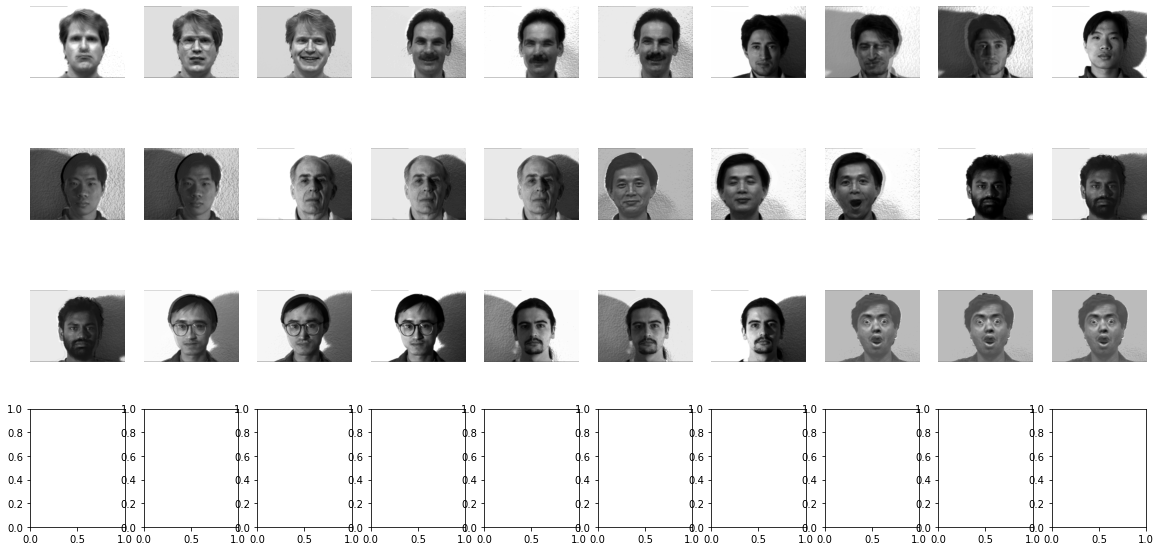

In [20]:
f, axarr = plt.subplots(int(np.ceil(land.shape[0] / 10.0)) + 1, 10,figsize=(20,10))
for i in range(land.shape[0]):
    axarr[int(np.floor(i / 10)), (i % 10)].imshow(land[i], cmap='gray')
    axarr[int(np.floor(i / 10)), (i % 10)].axis('off')

In [35]:
m_14

gp_classification.,value,constraints,priors
rbf.variance,1.0867440329985614,+ve,
rbf.lengthscale,1.0,+ve,


In [36]:
average_variance = np.average([1.0867440325290179,1.0867439555885396,1.0867440091413954,1.0867440257508991,1.0867439477865806,
                              1.0867440325106958,1.0867440091322234,1.0867439551006763,1.0867438776906666,1.08674403304669,
                              1.086744025214903,1.0867439478438687,1.0867440252240668,1.0867440325290247,1.0867440329985614])
average_lengthscale = np.average([1.0,1.0,1.0,1.0,1.0,
                                 1.0,1.0,1.0,1.0,1.0,
                                 1.0,1.0,1.0,1.0,1.0])

In [38]:
average_variance

1.0867439961391874

In [153]:
labels= labels.reshape(90,)

In [39]:
kernel = 1.0867439961391874 * RBF(1.0)
gpc_true = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x, labels)

 C:\Users\anany\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [44]:
def landmark_gp_clustering_accuracy(gpc_true, landmarks, coords, y):
    if(landmarks.shape[0] < 16):
        return 0
    kernel = 1.0867439961391874 * RBF(1.0)
    landmark_labels = gpc_true.predict(landmarks)
    print(landmark_labels)
    gpc = GaussianProcessClassifier(kernel=kernel,random_state=0, max_iter_predict = 1000).fit(landmarks, landmark_labels)
    predicted_labels = gpc.predict(coords)
    print("Landmarks: ", landmarks.shape[0], "Accuracy: ", accuracy_score(y, predicted_labels))
    return accuracy_score(y, predicted_labels)

In [48]:
def landmark_clustering_accuracy(landmarks, coords, y):
    if(landmarks.shape[0] < 2 ):
        return 0
    knn_true = KNeighborsClassifier(n_neighbors=1).fit(coords, y)
    landmark_labels = knn_true.predict(landmarks)
    knn_land = KNeighborsClassifier(n_neighbors=1).fit(landmarks, landmark_labels)
    predicted_labels = knn_land.predict(coords)
    print("Landmarks: ", landmarks.shape[0], "Accuracy: ", accuracy_score(y, predicted_labels))
    return accuracy_score(y, predicted_labels)

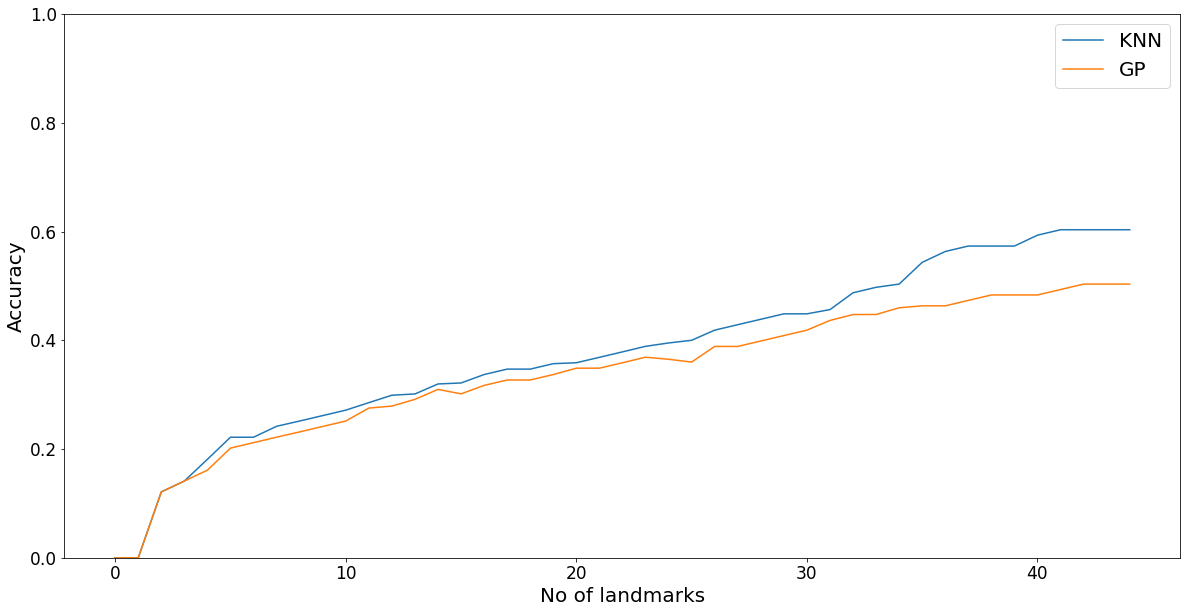

In [5]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(0, 45, 1), accuracies_knn, label = "KNN")
plt.plot(range(0, 45, 1), accuracies_gp, label = "GP")
plt.xlabel('No of landmarks' ,fontsize=20)
plt.ylabel('Accuracy' ,fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.legend(fontsize=20)
plt.ylim(0, 1.0)
plt.show()
fig.savefig('testset_paisley_yales_Gpy.png')